In [1]:
import scipy.stats as stats
import numpy as np

!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

In [2]:
#1a
l = np.random.randint(1,100,100)

print(np.mean(l))

50.32


In [3]:
#1b
price =  pdr.data.DataReader('ITI', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]
returns = price.pct_change().iloc[1:,]
print(returns.head())
returns.mean()

Date
2017-01-04   -0.005525
2017-01-05   -0.002778
2017-01-06    0.075209
2017-01-09   -0.018135
2017-01-10    0.013193
Name: Adj Close, dtype: float64


0.0005834346184473813

In [4]:
#2a
median = np.median(l)
print(median)

53.5


In [5]:
#2b
price =  pdr.data.DataReader('MSFT', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]
returns = price.pct_change().iloc[1:,]
print(returns.median())

0.0014298272092225783


In [6]:
#3a
stats.mode(l)[0][0]

16

In [16]:
#3b
price =  pdr.data.DataReader('MSFT', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]
returns = price.pct_change().iloc[1:,]

(hist, buckets) = np.histogram(returns, bins = 20)

print(hist)
print(buckets)

max_freq = np.max(hist)

mode = [(buckets[i], buckets[i+1])for i,j in enumerate(hist) if j == max_freq]

print(mode)

[  3   2   3  10   9  19  31  90 154  84  59  19   7   3   4   0   0   1
   2   1]
[-0.05433811 -0.04783593 -0.04133375 -0.03483157 -0.0283294  -0.02182722
 -0.01532504 -0.00882286 -0.00232068  0.0041815   0.01068367  0.01718585
  0.02368803  0.03019021  0.03669239  0.04319457  0.04969674  0.05619892
  0.0627011   0.06920328  0.07570546]
[(-0.002320682442776431, 0.004181495853746088)]


In [17]:
#4a
stats.gmean(l)

37.426720627717955

In [20]:
#4b
price =  pdr.data.DataReader('MSFT', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]

stats.gmean(price)

83.08610648147035

In [21]:
#5a
stats.hmean(l)

17.98858582616796

In [22]:
price =  pdr.data.DataReader('XLF', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]

stats.hmean(price)

25.425507532672228

negatively skewed


Text(0.5, 0, 'return')

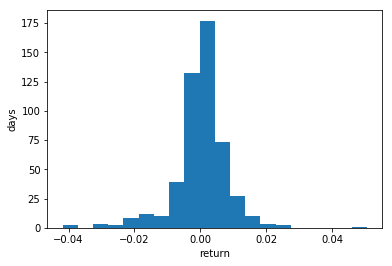

In [27]:
#6
price =  pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]
returns = price.pct_change().iloc[1:,]

if returns.mean() < returns.median():
    print('negatively skewed')
else:
    print('positively skewed')
    
import matplotlib.pyplot as plt
    
plt.hist(returns, bins = 20)
plt.ylabel('days')
plt.xlabel('return')